### About
A top down view demonstration using perspective change.

#### Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Input Image
We use a Logitech Webcam to capture the following image.

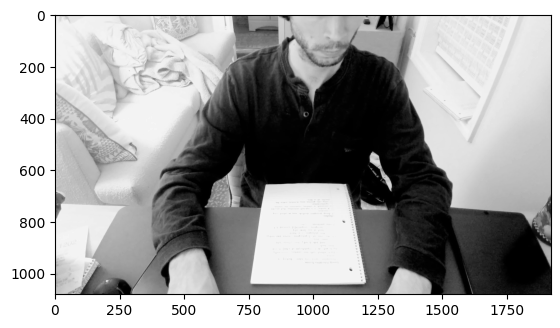

In [59]:
TD = cv2.imread('../data/topdown.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(TD, cmap='gray');


#### The point selector
This method extracts the page for perspective change. An automatic edge detection based technique can also be employed instead.

In [21]:
def point_selector(image):

    points = []
    
    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            # Append the new point (x, y)
            points.append((x, y))

            # Draw a small circle at the click point
            cv2.circle(img, (x, y), 3, (255, 255, 255), -1)

            # Draw the polygon if there are at least two points
            if len(points) >= 2:
                cv2.polylines(img, [np.array(points)], isClosed=False, color=(255, 255, 255), thickness=2)

            cv2.imshow('image', img)
    # Load an image
    img = image.copy()
    if img is None:
        print("Error: Image not found.")
    else:
        # Create a window
        cv2.namedWindow('image')
        cv2.setMouseCallback('image', click_event)

        # Display the image
        cv2.imshow('image', img)

        # Wait until any key is pressed
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    return points


def perspective_mapping(image, src_points, dst_size):
    # Define the source points from the image
    src = np.array(src_points, dtype="float32")

    # The destination size will be used to create the destination points
    width, height = dst_size

    # Destination points - these will form a rectangle where the new image will be mapped
    dst = np.array([
        [0, 0],
        [0, height - 1],
        [width - 1, height - 1],
        [width - 1, 0]],
        dtype="float32")

    # Compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(image, M, (width, height))

    # Return the warped image
    return warped

The result is shown below.

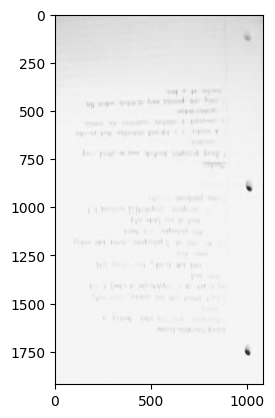

In [61]:
src_pts = np.array([[815, 657], [756, 1035], [1180, 1030], [1112, 658]], dtype=np.float32)
TD_res = perspective_mapping(TD, src_pts, (1080,1920))
plt.imshow(TD_res, cmap='gray');

#### Rotating the image
We'll now invert the image so that it's correctly oriented.

In [26]:
def rotate_image(image, angle):
    """
    Rotate the given image by the specified angle.
    
    :param image: Input image to be rotated.
    :param angle: The rotation angle in degrees. Positive values mean
                  counter-clockwise rotation.
    :return: The rotated image.
    """
    # Get the image size
    height, width = image.shape[:2]

    # Calculate the center of the image
    center = (width / 2, height / 2)

    # Get the rotation matrix using the cv2.getRotationMatrix2D function
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Perform the rotation using cv2.warpAffine
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

    return rotated_image

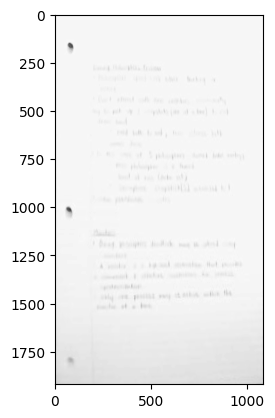

In [62]:
end_result = rotate_image(TD_res, 180)
plt.imshow(end_result, cmap='gray');

#### Image Processing
We'll use processing techniques like histogram equalization and sharpening kernels to displahy the result.

In [63]:
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(3, 3)).apply(end_result)

sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(clahe, -1, sharpen_kernel)

thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

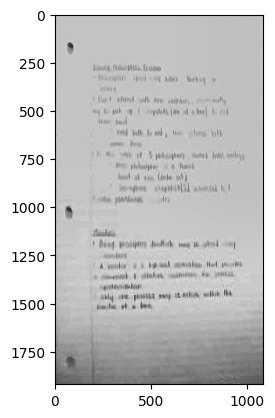

In [66]:
plt.imshow(sharpen, cmap='gray')
plt.show()


#### Conclusion
Given the initial resolution of the input image, this result seems to be sufficient in capturing the essense of the contents of the page. A higher resolution image or OCR detection techniques would improve this result.